Loading Datasets

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("./data/titanic.csv")

In [4]:
type(titanic_df)

pandas.core.frame.DataFrame

In [6]:
titanic_df.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [7]:
titanic_df.shape

(1313, 11)

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


# Indexing ANd SLicing

In [11]:
titanic_df[0:3]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


In [13]:
titanic_df[-2:]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


In [15]:
titanic_df['name'][0:5]

0                       Allen, Miss Elisabeth Walton
1                        Allison, Miss Helen Loraine
2                Allison, Mr Hudson Joshua Creighton
3    Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                      Allison, Master Hudson Trevor
Name: name, dtype: object

In [20]:
titanic_df[['name','age']][0:5]

,name,age
0,"Allen, Miss Elisabeth Walton",29.0000
1,"Allison, Miss Helen Loraine",2.0000
2,"Allison, Mr Hudson Joshua Creighton",30.0000
3,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000
4,"Allison, Master Hudson Trevor",0.9167


# Basic Insights

In [22]:
titanic_df['survived'].value_counts()

0    864
1    449
Name: survived, dtype: int64

In [23]:
titanic_df['survived'].value_counts(normalize = True) * 100


0    65.803503
1    34.196497
Name: survived, dtype: float64

### SUrvived vs SEX

In [25]:
pd.crosstab(titanic_df.survived,titanic_df.sex,margins = True)

sex,female,male,All
survived,,,
0,156,708,864
1,307,142,449
All,463,850,1313


In [27]:
pd.crosstab(titanic_df.survived,titanic_df.sex,normalize = 'columns')

sex,female,male
survived,,
0,0.336933,0.832941
1,0.663067,0.167059


In [29]:
pd.crosstab(titanic_df.survived,titanic_df.sex,normalize = 'index')

sex,female,male
survived,,
0,0.180556,0.819444
1,0.683742,0.316258


In [36]:
pd.crosstab(titanic_df.pclass,titanic_df.survived,normalize = 'index',margins = True)

survived,0,1
pclass,,
1st,0.400621,0.599379
2nd,0.575000,0.425000
3rd,0.807314,0.192686
All,0.658035,0.341965


## Finding unique point

In [38]:
titanic_df.embarked.unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

In [40]:
titanic_df.embarked.dropna().unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [43]:
titanic_clean_df = titanic_df.dropna(subset = ['survived','pclass'],how = 'all')

### Age Distribution

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

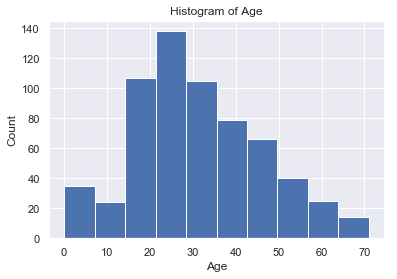

In [50]:
plt.hist(titanic_df.age.dropna())
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.savefig('age.png')

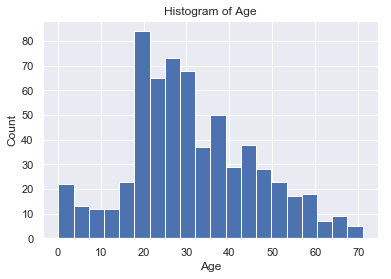

In [52]:
plt.hist(titanic_df.age.dropna(),bins = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.savefig('age.png')

## Average age of passengers in each class

In [54]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1st    39.667773
2nd    28.300314
3rd    24.519658
Name: age, dtype: float64

### to create index

In [57]:
avg_age_df = (titanic_df
              .groupby('pclass')['age']
              .mean()
              .reset_index())

In [59]:
avg_age_df.to_csv("avg.csv",index = False)

## Learn PEP 8

In [63]:
titanic_df['gender'] = (titanic_df['sex']
                        .map(lambda x : 1 if x == 'male' else 0))

In [65]:
titanic_df[['sex','gender']][0:10]

,sex,gender
0,female,0
1,female,0
2,male,1
3,female,0
4,male,1
5,male,1
6,female,0
7,male,1
8,female,0
9,male,1


In [67]:
titanic_df.sample(5,random_state = 42)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,gender
51,52,1st,0,"Case, Mr Howard Brown",49.0,Southampton,"Ascot, Berkshire / Rochester, NY",NaN,NaN,NaN,male,1
405,406,2nd,0,"Fillbrook, Mr Charles",NaN,Southampton,"Cornwall / Houghton, MI",NaN,NaN,NaN,male,1
721,722,3rd,0,"Coelho, Mr Domingos Fernandes",20.0,Southampton,Portugal,NaN,NaN,NaN,male,1
485,486,2nd,0,"Louch, Mr Charles Alexander",48.0,Southampton,"Weston-Super-Mare, Somerset",NaN,NaN,(121),male,1
1177,1178,3rd,0,"Sage, Mrs John",NaN,NaN,NaN,NaN,NaN,NaN,female,0
